# 03 – Exploratory Data Analysis (EDA)
Notebook ini melakukan eksplorasi data awal pada hasil preprocessing komentar YouTube
terkait isu dugaan korupsi proyek Kereta Cepat Whoosh.

Dataset input:
- `data/clean_comments.csv`

Analisis mencakup:
1. Distribusi label sentimen
2. Statistik panjang komentar
3. Kata yang paling sering muncul
4. Wordcloud per kelas sentimen
5. Analisis TF–IDF: top terms per label

Notebook ini bertujuan memberikan gambaran awal untuk bagian *Data Understanding*
di paper IEEE.

## Import Library

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import numpy as np

## Load Dataset

In [5]:
DATA_DIR = "../data"
CLEAN_PATH = os.path.join(DATA_DIR, "clean_comments.csv")

df = pd.read_csv(CLEAN_PATH)
print("Jumlah data:", len(df))
df.head()

Jumlah data: 953


,comment,text_clean,sentiment,label_encoded
0,Yg benci ya apa aja salah.. \nYg seneng ya mak...,yang benci ya apa saja salah yang seneng ya ma...,neutral,1
1,Bandung akan miliki kereta pajajaran dgn beaya...,bandung akan miliki kereta pajajaran dengan be...,neutral,1
2,SUDAH JELAS GENG SOLO YANG HARUS BERTANGGUNG J...,sudah jelas geng solo yang harus bertanggung j...,negative,0
3,"Jokowi, Luhut, kroni2 yg harus bertanggungjaw...",jokowi luhut kroni yang harus bertanggungjawa...,negative,0
4,Yg ditangkap gorengan yg makan duduk manis,yang ditangkap gorengan yang makan duduk manis,neutral,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   comment        953 non-null    object
 1   text_clean     953 non-null    object
 2   sentiment      953 non-null    object
 3   label_encoded  953 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 29.9+ KB


## Distribusi Label Sentimen

C:\Users\hafizh\AppData\Local\Temp\ipykernel_13708\3922279947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", order=["negative","neutral","positive"], palette="Set2")


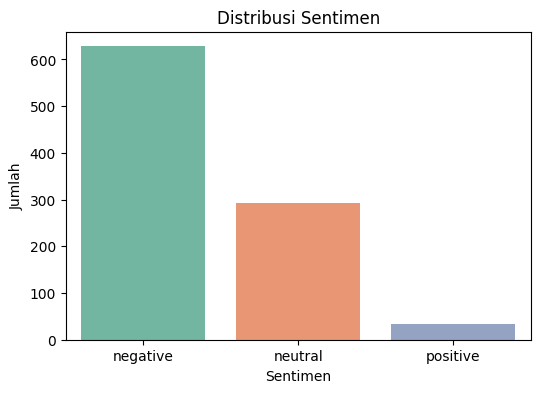

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sentiment", order=["negative","neutral","positive"], palette="Set2")
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()

## Distribusi Panjang Komentar

In [8]:
df["char_len"] = df["text_clean"].apply(len)
df["word_len"] = df["text_clean"].apply(lambda x: len(str(x).split()))

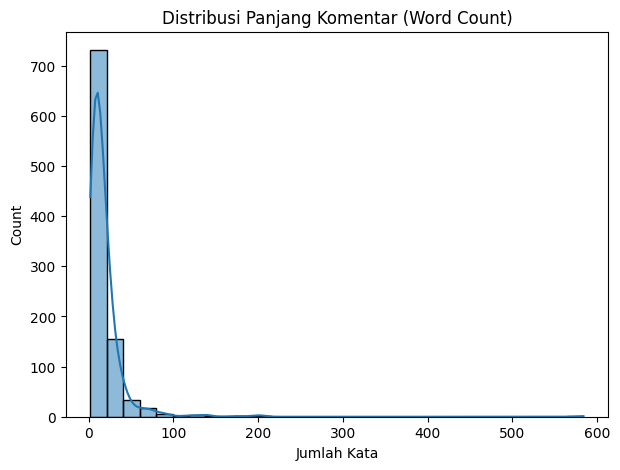

In [9]:
plt.figure(figsize=(7,5))
sns.histplot(df["word_len"], bins=30, kde=True)
plt.title("Distribusi Panjang Komentar (Word Count)")
plt.xlabel("Jumlah Kata")
plt.show()

C:\Users\hafizh\AppData\Local\Temp\ipykernel_13708\2347057184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="sentiment", y="word_len",


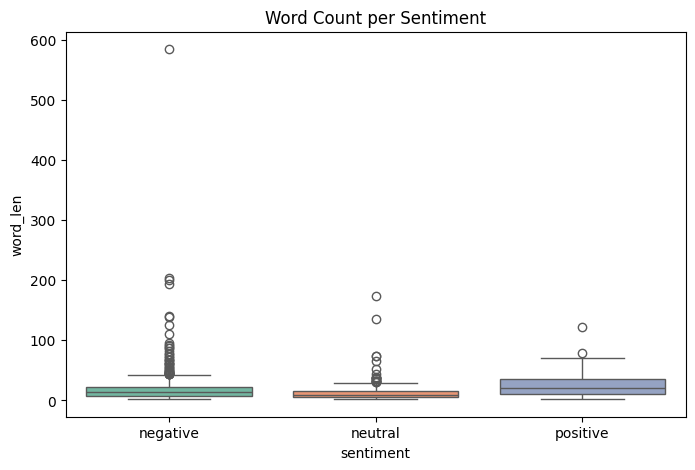

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="sentiment", y="word_len",
            order=["negative","neutral","positive"], palette="Set2")
plt.title("Word Count per Sentiment")
plt.show()

## Kata Paling Sering Muncul (Top Words)

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

indo_stopwords = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hafizh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
vectorizer = CountVectorizer(stop_words=indo_stopwords)
bow = vectorizer.fit_transform(df["text_clean"])
word_freq = np.array(bow.sum(axis=0)).flatten()

words = vectorizer.get_feature_names_out()
freq_df = pd.DataFrame({"word": words, "freq": word_freq})
freq_df = freq_df.sort_values("freq", ascending=False)

freq_df.head(20)


c:\Users\hafizh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


,word,freq
1785,kpk,188
3067,rakyat,187
1406,jokowi,185
2580,nya,149
2477,negara,106
1268,indonesia,100
1774,korupsi,93
3025,proyek,91
1639,kereta,89
2641,orang,88


C:\Users\hafizh\AppData\Local\Temp\ipykernel_13708\198517056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df.head(15), x="freq", y="word", palette="viridis")


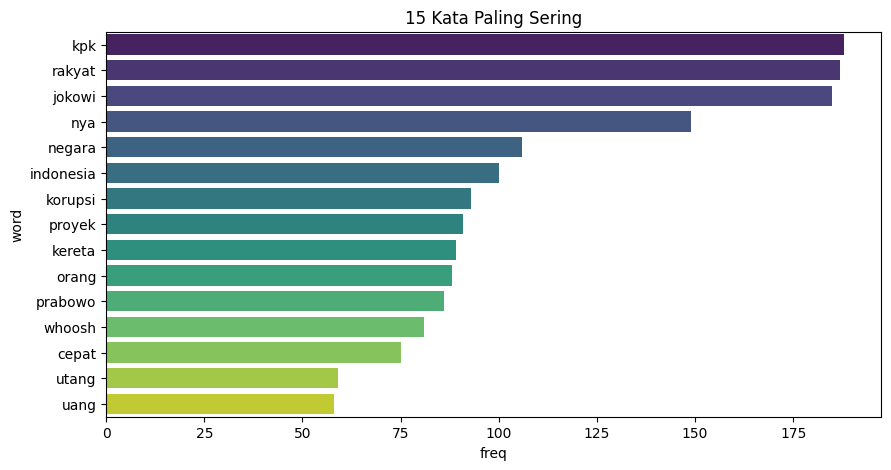

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data=freq_df.head(15), x="freq", y="word", palette="viridis")
plt.title("15 Kata Paling Sering")
plt.show()

## Wordcloud per Sentimen

In [15]:
def generate_wordcloud(text, title):
    wc = WordCloud(width=800, height=400,
                   background_color="white",
                   colormap="viridis").generate(text)
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

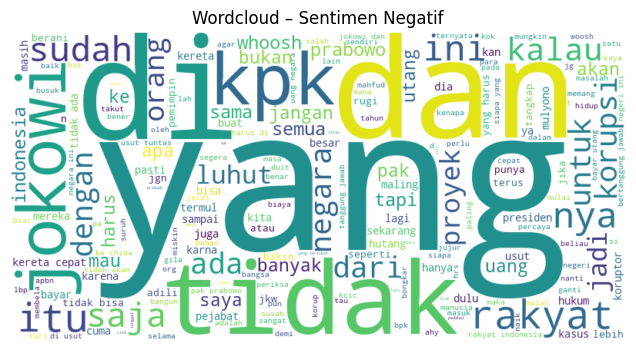

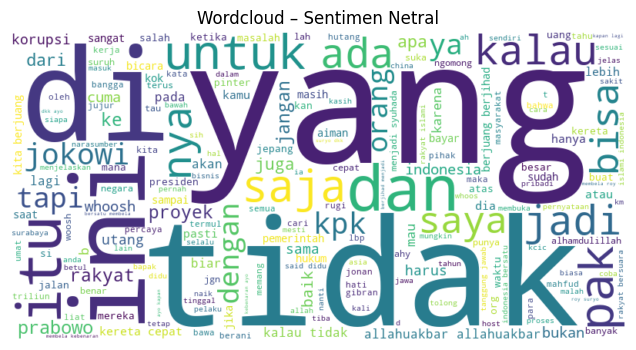

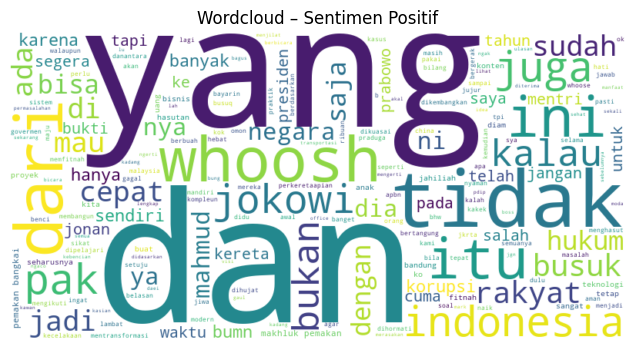

In [16]:
# Negative
neg_text = " ".join(df[df.sentiment=="negative"]["text_clean"])
generate_wordcloud(neg_text, "Wordcloud – Sentimen Negatif")

# Neutral
neu_text = " ".join(df[df.sentiment=="neutral"]["text_clean"])
generate_wordcloud(neu_text, "Wordcloud – Sentimen Netral")

# Positive
pos_text = " ".join(df[df.sentiment=="positive"]["text_clean"])
generate_wordcloud(pos_text, "Wordcloud – Sentimen Positif")

## Top TF–IDF Terms Per Sentimen

In [18]:
indo_stopwords = [
    "yang","dan","di","ke","dari","untuk","itu","ini","pada","ada","karena",
    "dengan","atau","juga","kita","saya","kami","mereka","dia","ya","buat",
    "ga","gak","tidak","bukan","agar","supaya","udah","sudah","dah","lagi",
    "dalam","kalau","kalo","tentang","sebagai","bahwa","jadi","bisa","akan",
    "terhadap","tp","tapi","dan","yg","nya","si","pun","lah","kok","dong",
    "nih","loh","mah","kan","nya","eh","ya","deh","oh","hehe","wkwk","wk",
    "kayak","kayaknya","banget"," banget","sih","aja","aja","orang"
]

In [19]:
tfidf = TfidfVectorizer(stop_words=indo_stopwords)
tfidf_matrix = tfidf.fit_transform(df["text_clean"])
terms = tfidf.get_feature_names_out()

In [20]:
def top_tfidf_terms(label, n=15):
    idx = df[df.sentiment == label].index
    sub_matrix = tfidf_matrix[idx]
    mean_tfidf = np.array(sub_matrix.mean(axis=0)).flatten()
    
    top_idx = mean_tfidf.argsort()[::-1][:n]
    
    return pd.DataFrame({
        "term": terms[top_idx],
        "tfidf": mean_tfidf[top_idx]
    })

In [21]:
print("Top TF-IDF – NEGATIVE")
display(top_tfidf_terms("negative"))

print("Top TF-IDF – NEUTRAL")
display(top_tfidf_terms("neutral"))

print("Top TF-IDF – POSITIVE")
display(top_tfidf_terms("positive"))


Top TF-IDF – NEGATIVE


,term,tfidf
0,kpk,0.042553
1,jokowi,0.037028
2,rakyat,0.028359
3,saja,0.021169
4,luhut,0.019770
5,harus,0.019761
6,negara,0.019138
7,korupsi,0.019042
8,usut,0.018013
9,prabowo,0.017047


Top TF-IDF – NEUTRAL


,term,tfidf
0,pak,0.022114
1,saja,0.015287
2,kpk,0.014875
3,jokowi,0.013911
4,prabowo,0.013082
5,jangan,0.012854
6,rakyat,0.011146
7,baik,0.010618
8,apa,0.009713
9,korupsi,0.009590


Top TF-IDF – POSITIVE


,term,tfidf
0,jokowi,0.039924
1,pak,0.033830
2,dipastikan,0.030303
3,whoosh,0.023876
4,banyak,0.023761
5,indonesia,0.023569
6,saja,0.023501
7,mahmud,0.023109
8,mantapp,0.022976
9,rakyat,0.021925


## Insight Penting dari EDA

1. **Distribusi sentimen**
   - Mayoritas komentar cenderung negatif (sesuai isu dugaan korupsi yang sensitif secara politik).
   - Komentar netral dan positif lebih sedikit.

2. **Panjang komentar**
   - Komentar negatif cenderung lebih panjang → lebih banyak keluhan/argumen.
   - Komentar positif cenderung singkat.

3. **Wordcloud**
   - Wordcloud negatif memperlihatkan kata seperti *korupsi, proyek, anggaran, rugi, pejabat, jokowi, luhut*.
   - Wordcloud positif menampilkan kata seperti *maju, bangga, cepat, teknologi*.
   - Wordcloud netral banyak berisi pertanyaan atau fakta umum.

4. **TF-IDF**
   - TF-IDF negatif memperkuat konteks kritik (korupsi, pejabat, biaya, bengkak, proyek).
   - TF-IDF positif menunjukkan apresiasi terhadap teknologi dan kecepatan.
   - TF-IDF netral bersifat informatif/penjelasan.

Insight ini nanti bisa dipakai untuk bagian **Data Understanding** dan **Result & Analysis** di paper IEEE.